In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import aup
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [3]:
%matplotlib inline

In [4]:
def plot_hist(gdf, city, save=False):
    fig, axes = plt.subplots(1,3,figsize=(18,6), sharey=True, sharex=True)
    for column, ax in zip(['dist_supermercados','dist_hospitales','dist_farmacias'], axes.flatten()):
        hist, bins = np.histogram(gdf[gdf[column]>0][column],bins=20)
        ax.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='#2b2b2b')
        ax.set_title(column.replace('dist_','')+'\n dist. promedio: {} m.'.format(round(gdf[gdf[column]>0][column].mean(),2)),fontsize=17)
        ax.set_xlabel('Distancia $(m)$ a {}'.format(column.replace('dist_','')),fontsize=17)
    axes[0].set_ylabel('Porcentaje de intersecciones', fontsize=17)
    fig.suptitle(city, fontsize=27,y=1.05,x=0.51)
    if save==True:
        plt.savefig(f'../output/figures/{city}_histogram_distancias.png',dpi=300)

In [5]:
cities = ['Aguascalientes','Cuernavaca','Guadalajara','Laguna','Merida',
          'Mexicali','Mexico','Monterrey','Puebla','Querétaro','Saltillo',
         'SLP','Toluca']
columns = ['dist_supermercados','dist_farmacias','dist_hospitales']


In [211]:
for city in cities:
    gdf = gpd.read_file(f'../data/processed/{city}_hex_bins.geojson')
    plot_hist(gdf,city, save=True)

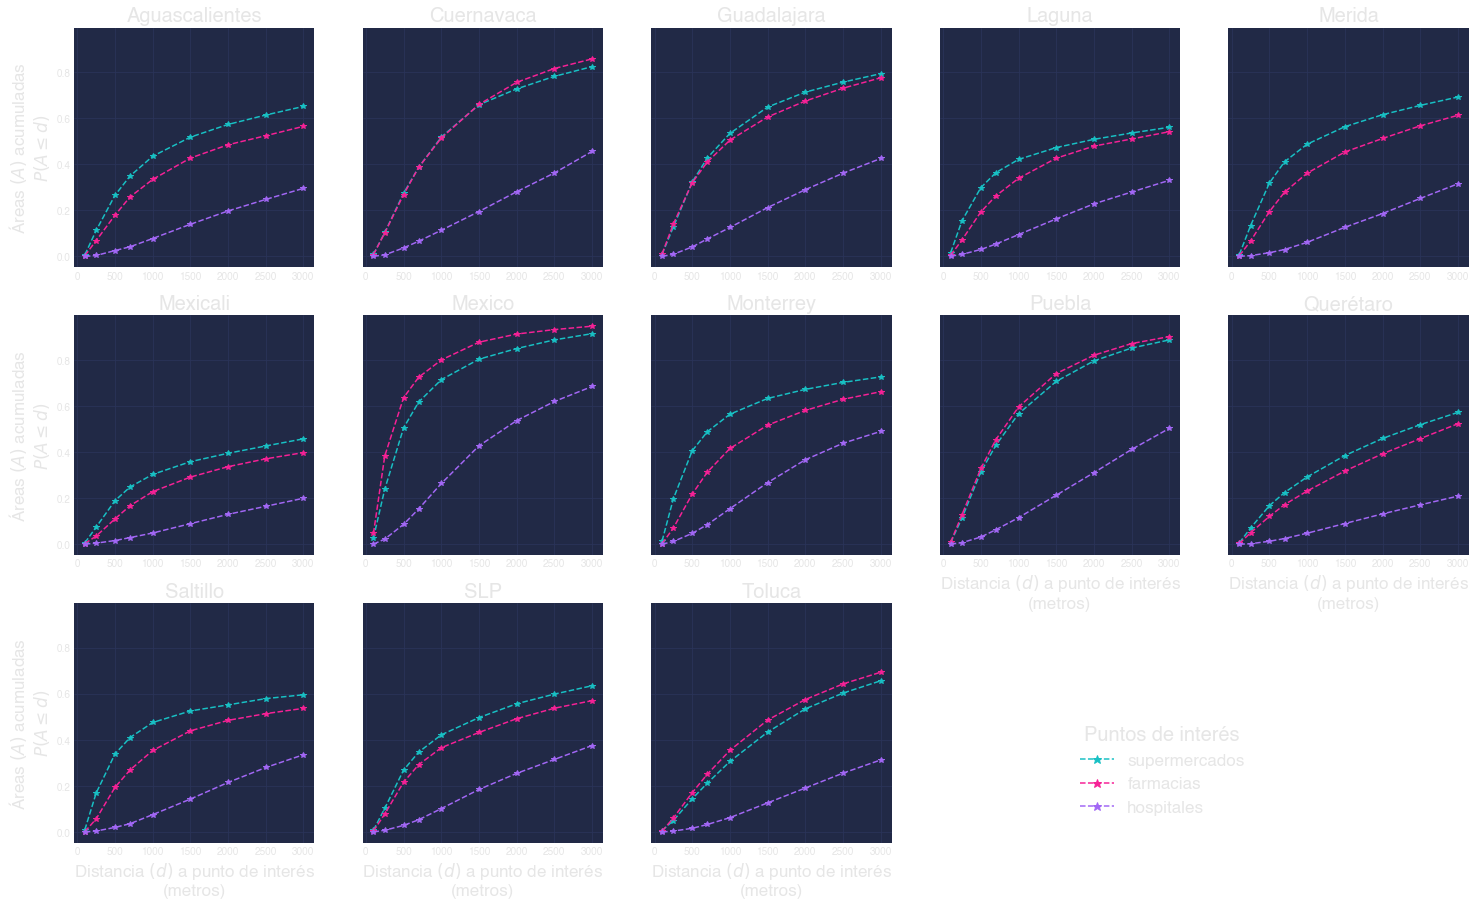

In [6]:
fig, axes = plt.subplots(3,5,figsize=(25,15), sharex=False,sharey=True)

for city, ax in zip(cities,axes.flatten()):
    gdf_ = gpd.read_file(f'../data/processed/{city}_hex_bins.geojson')
    for column in columns:
        gdf = gdf_[gdf_[column]>0]
        counts = {threshold: gdf[gdf[column]<=threshold][column].count()/gdf[column].count() for threshold in [100,250,500,700,1000,1500,2000,2500,3000]}    
        ax.plot(list(counts.keys()),list(counts.values()),ls='--',marker='*',label=column.replace('dist_',''))
        ax.set_title(city,fontsize=20)
        
for i in range(3):
    axes[i][0].set_ylabel('Áreas $(A)$ acumuladas\n$P(A \leq d)$', fontsize=17)
    
for i in range(5):
    axes[2,i].set_xlabel('Distancia $(d)$ a punto de interés\n(metros)',fontsize=17)
    if i > 2:
        axes[1,i].set_xlabel('Distancia $(d)$ a punto de interés\n(metros)',fontsize=17)
lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines[:3], labels[:3],           
           loc='lower right', bbox_to_anchor=(0.7, 0.07),
           fontsize=17,markerscale=1.5, title='Puntos de interés',title_fontsize=20)
fig.delaxes(axes[2,4])
fig.delaxes(axes[2,3])

plt.savefig(f'../output/figures/CDF_distancias.png',dpi=300)
    

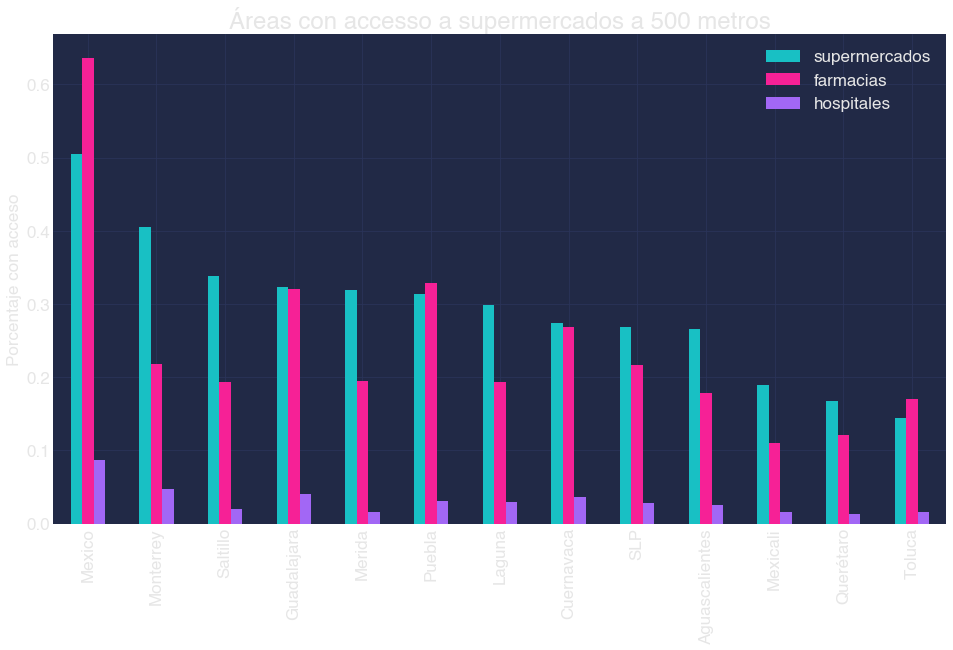

In [30]:
data = {}
threshold = 500
for city in cities:
    gdf_ = gpd.read_file(f'../data/processed/{city}_hex_bins.geojson')
    data_t={}
    for column in columns:
        gdf = gdf_[gdf_[column]>0]
        data_t[column.replace('dist_','')] = gdf[gdf[column]<=threshold][column].count()/gdf[column].count()
    data[city]=data_t
    
df = pd.DataFrame(data).T
df.sort_values([column.replace('dist_','') for column in columns], ascending=False, inplace=True)

fig, ax = plt.subplots(1,1,figsize=(16,9))
df.plot(kind='bar', ax=ax)
ax.legend(loc=1, fontsize=17)
ax.set_title(f'Áreas con accesso a supermercados a {threshold} metros', fontsize=24)
ax.set_ylabel('Porcentaje con acceso', fontsize=17)
ax.tick_params(labelsize=17)
plt.savefig(f'../output/figures/areas_acceso_{threshold}.png',dpi=300)

In [28]:
df.to_clipboard()

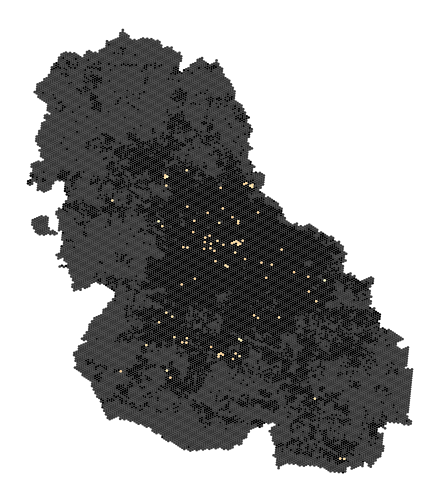

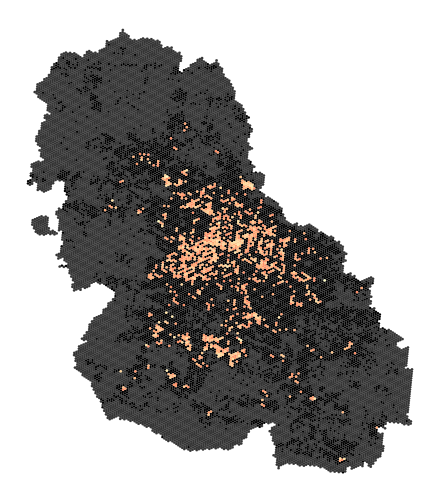

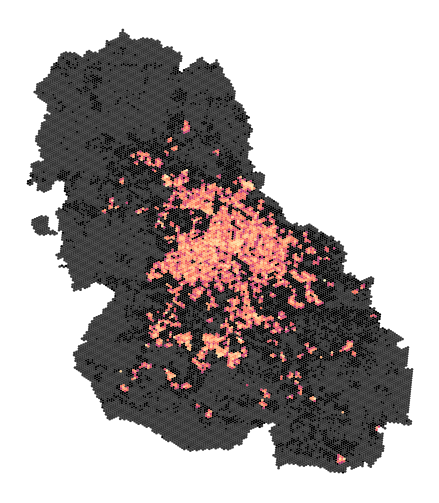

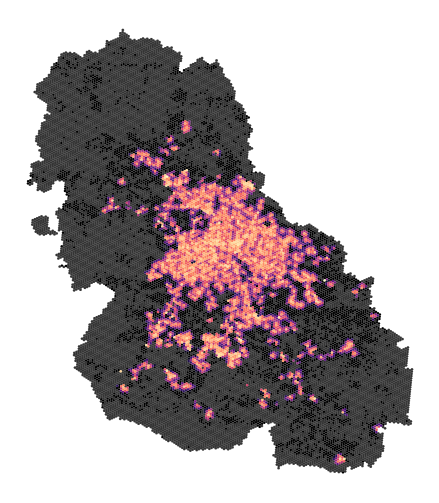

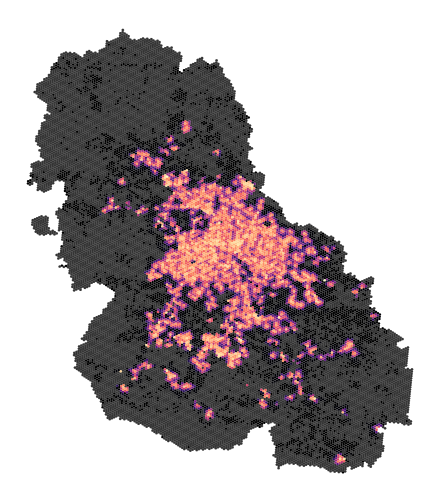

In [17]:
column='dist_supermercados'
city = 'Guadalajara'
threshold = 500

gdf_ = gpd.read_file(f'../data/processed/{city}_hex_bins.geojson')
gdf = gdf_[gdf_[column]>0]
#fig,axes=plt.subplots(1,3, figsize=(16,9))

for threshold in [100,250,500,1000,2000]:
    fig,ax=plt.subplots(1,1, figsize=(9,9))
    gdf_[gdf_[column]==0].plot(color='#2b2b2b',alpha=0.95, linewidth=0.1, edgecolor='k', zorder=0,ax=ax)
    gdf[gdf[column]>threshold].plot(color='k',ax=ax,zorder=1)
    gdf[gdf[column]<=threshold].plot(column=column,ax=ax,zorder=2,cmap='magma_r',vmax=1000)
    ax.axis('off')
    plt.savefig(f'../output/figures/{city}_{threshold}_mts.png',dpi=300,transparent=True);

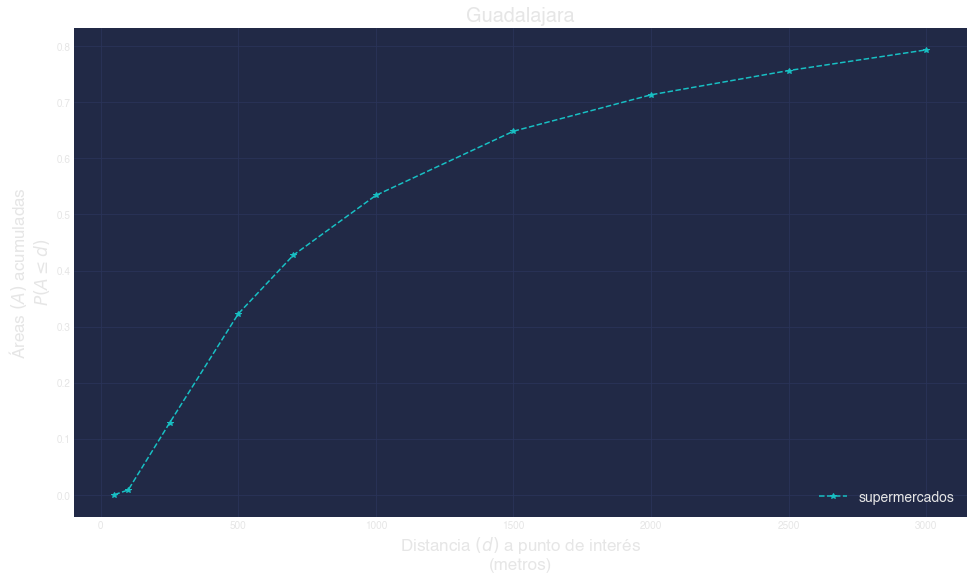

In [23]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
gdf_ = gpd.read_file(f'../data/processed/{city}_hex_bins.geojson')
gdf = gdf_[gdf_[column]>0]
counts = {threshold: gdf[gdf[column]<=threshold][column].count()/gdf[column].count() for threshold in [50,100,250,500,700,1000,1500,2000,2500,3000]}    
ax.plot(list(counts.keys()),list(counts.values()),ls='--',marker='*',label=column.replace('dist_',''))
ax.set_title(city,fontsize=20)
ax.set_ylabel('Áreas $(A)$ acumuladas\n$P(A \leq d)$', fontsize=17)
ax.set_xlabel('Distancia $(d)$ a punto de interés\n(metros)',fontsize=17)
ax.legend(loc=4,fontsize=14)
plt.savefig(f'../output/figures/{city}_CDF_{column}.png',dpi=300,transparent=False);